https://numpy.org/doc/stable/reference/index.html

# NumPy array basics

## Datatypes

https://docs.scipy.org/doc/numpy/user/basics.types.html

## Attributes
https://www.numpy.org/doc/1.16/reference/arrays.ndarray.html#array-attributes  
ndim  
shape  
size  
dtype  
itemsize  
nbytes  

nbytes = itemsize * size


In [199]:
import numpy as np

## Creating array from scratch
For larger array, it is more efficient to create arrays from scratch using built-in routines.

In [200]:
np.zeros(10, dtype='int32') # Integer array of length 10 filled with zeros

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [201]:
np.ones((3, 5), dtype='float64') # 3x5 floating point array filled with ones

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [202]:
np.empty((3, 5)) # Uninitialised 3x5 array

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [203]:
np.full((3, 5), 3.14, dtype='float32') # 3x5 array filled with 3.14

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]], dtype=float32)

In [204]:
np.arange(0, 20, 2) # Array with linear sequence and step 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [205]:
np.linspace(0, 1, 5) # Array with 5 evenly-spaced values between min and max

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [206]:
np.random.random((3, 5)) # 3x3 array of uniformly distributed random values between 0 and 1

array([[0.91723091, 0.77306245, 0.30827983, 0.50275211, 0.40045429],
       [0.70207412, 0.65210811, 0.71894923, 0.98150685, 0.78846493],
       [0.30180608, 0.71698189, 0.43892518, 0.20992354, 0.60066998]])

In [207]:
np.random.normal(0, 1, (3, 3)) # 3x3 array of normally distributed random values with mean 0, sd 1

array([[ 0.70240073,  1.88004781,  0.87476498],
       [ 0.3193321 ,  1.51697807,  0.28591896],
       [-0.65589295, -1.0497567 ,  0.0375089 ]])

In [208]:
np.random.randint(0, 10, (3, 3)) # 3x3 array of random integers in the interval [0, 10)

array([[9, 7, 5],
       [8, 8, 6],
       [6, 5, 0]])

In [209]:
np.eye(3) # 3x3 identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Slicing array
* Access a subarray
* Returns a view rather than a copy of the data
    * When working with large data set, we can access and process pieces of data without copying the data buffer
    * Syntax: **x[start:stop:step]**


In [210]:
# Seed for reproducibility
np.random.seed(0)

In [211]:
x1 = np.random.randint(10, size=6)
x2 = np.random.randint(10, size=(3, 4))
x3 = np.random.randint(10, size=(3, 4, 5))

In [212]:
x2[:2, 0:3:2]

array([[3, 2],
       [7, 8]])

In [213]:
x3[0:, :2]

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6]]])

## Reshaping array

In [214]:
grid = np.arange(1, 10).reshape(3, 3)
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## Concatenate and split array

### Concatenate
**1D**

In [215]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
np.concatenate([x, y])

array([1, 2, 3, 4, 5, 6])

In [216]:
z = [100]
np.concatenate([x, y, z])

array([  1,   2,   3,   4,   5,   6, 100])

**2D**

In [217]:
grid = np.array([[1, 2, 3], [4, 5, 6]])
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [218]:
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the **np.vstack**
(vertical stack) and **np.hstack** (horizontal stack) functions.  

Similarly, **np.dstack** will stack arrays along the third axis.  
https://stackoverflow.com/questions/25116595/understanding-numpys-dstack-function

In [219]:
x = np.array([1, 2, 3])
grid = np.array([[4, 5, 6], [7, 8 ,9]])
np.vstack([x, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [220]:
y = np.array([[100], [101]])
np.hstack([grid, y])

array([[  4,   5,   6, 100],
       [  7,   8,   9, 101]])

In [221]:
np.dstack([grid, grid])

array([[[4, 4],
        [5, 5],
        [6, 6]],

       [[7, 7],
        [8, 8],
        [9, 9]]])

### Split

The opposite of concatenation is splitting, which is implemented by the functions **np.split**, **np.hsplit**, and **np.vsplit**. For each of these, we can pass a list of indices giving the split points.  
Similarly, **np.dsplit** will split arrays along the third axis.


In [222]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [4 5] [6 7 8 9]


In [223]:
grid = np.arange(16).reshape((4, 4))
upper, lower = np.vsplit(grid, 2)
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [224]:
left, right = np.hsplit(grid, 2)
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


# Computation on NumPy Arrays: Universal Functions
Computation on NumPy arrays can be very fast, or it can be very slow. The key to making it fast is to use **vectorized** operations, generally implemented through NumPy’s universal functions (ufuncs)

## The Slowness of Loops
The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated.  
Example:

In [225]:
import numpy as np

In [226]:
np.random.seed(0)
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = np.random.randint(1, 100, size=1000000)

It turns out that the bottleneck here is not the operations themselves, but the **type checking** and function dispatches that CPython must do at each cycle of the loop.  

Each time the reciprocal is computed, Python first examines the object’s type and does a dynamic lookup of the correct function to use for that type.  
If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.


## Introducing ufuncs
Vectorized operations in NumPy are implemented via ufuncs, whose main purpose is
to quickly execute repeated operations on values in NumPy arrays

In [227]:
%timeit compute_reciprocals(values)

1.8 s ± 67.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [228]:
%timeit (1.0 / values)

1.44 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [229]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [230]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

## Exploring ufuncs
https://docs.scipy.org/doc/numpy/reference/ufuncs.html

### Array arithmetic

In [231]:
x = np.arange(4)
print("x =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2) # floor division
print("-x = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2 = ", x % 2)
print(-(0.5*x + 1) ** 2)

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2 =  [0 1 0 1]
[-1.   -2.25 -4.   -6.25]


<img src="../figures/2.2-arithmetic-operations.png" width="600" />

### Trigonometric functions

In [232]:
theta = np.linspace(0, np.pi, 3)
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [233]:
x = [-1, 0, 1]
print("x = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### Exponents and logarithms

In [234]:
x = [1, 2, 3]
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))


x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]
ln(x) = [0.         0.69314718 1.09861229]
log2(x) = [0.        1.        1.5849625]
log10(x) = [0.         0.30103    0.47712125]


## Advanced ufunc features

### Specifying output
Using the **out** argument

In [235]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
y

array([ 0., 10., 20., 30., 40.])

we can write the results of a computation to every other element of a specified array

If we had instead written **y[::2] = 2 ** x**, this would have resulted in the creation of a temporary array to hold the results of **2 ** x**, followed by a second operation copying those values into the y array. This doesn’t make much of a difference for such a small computation, but for very large arrays the memory savings from careful use of the **out** argument can be significant.



In [236]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
y

array([ 1.,  0.,  2.,  0.,  4.,  0.,  8.,  0., 16.,  0.])

### Aggregates

Reduce and accumulate

In [237]:
x = np.arange(1, 6)
print(np.add.reduce(x))
print(np.multiply.reduce(x))

15
120


In [238]:
print(np.add.accumulate(x))
print(np.multiply.accumulate(x))

[ 1  3  6 10 15]
[  1   2   6  24 120]


Outer products

In [239]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

# Aggregations, min, max, everything in between

In [240]:
big_array = np.random.random(100000)

## Summing values in an array

In [241]:
print(sum(big_array))
print(np.sum(big_array))

50179.87980811672
50179.87980811712


In [242]:
%timeit sum(big_array)
%timeit np.sum(big_array)

14.8 ms ± 946 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
31 µs ± 948 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Minimum and maximum

In [243]:
print(min(big_array), max(big_array))
print(np.min(big_array), np.max(big_array))

7.071203171893359e-07 0.9999925005444847
7.071203171893359e-07 0.9999925005444847


In [244]:
%timeit min(big_array)
%timeit max(big_array)
%timeit np.min(big_array)
%timeit np.max(big_array)

8.71 ms ± 49.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.72 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
31.1 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
34.5 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Multidimensional aggregates
One common type of aggregation operation is an aggregate along a **row** or **column**.  
By default, each NumPy aggregation function will return the aggregate over the entire
array

In [245]:
M = np.random.random((3, 4))
print(np.min(M, axis=0)) # minimum value within each column
print(np.min(M, axis=1)) # minimum value within each row

[0.43763033 0.04436271 0.00184417 0.22131979]
[0.00184417 0.04436271 0.17430501]


Most aggregates have a NaN-safe counterpart that computes the result while ignoring missing values

<img src="../figures/2.3-aggregates.png" width="600" />

## Example: What Is the Average Height of US Presidents?


In [246]:
!head -4 ../data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [247]:
import pandas as pd

In [248]:
data = pd.read_csv('../data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [249]:
print("Mean height: ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max())
print("25th percentile:", np.percentile(heights, 25))
print("Median: ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

Mean height:  179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:  163
Maximum height:  193
25th percentile: 174.25
Median:  182.0
75th percentile:  183.0


In [250]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

Text(0, 0.5, 'number')

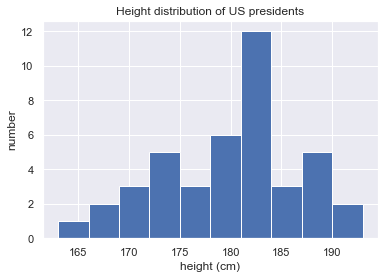

In [251]:
plt.hist(heights)
plt.title('Height distribution of US presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

# Computation on Arrays: Broadcasting
We saw in the previous section how NumPy’s universal functions can be used to vectorize operations and thereby remove slow Python loops.  
Another means of vectorizing operations is to use NumPy’s broadcasting functionality.  
Broadcasting is simply a set of rules for applying **binary** ufuncs (addition, subtraction, multiplication, etc.) on arrays of different sizes.

## Introducing broadcasting
Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [252]:
import numpy as np

In [253]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes—for example, we can just as easily add a scalar (think of it as a zero dimensional array) to an array

In [254]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value 5 into the array **[5, 5, 5]** , and adds the results.  
The advantage of NumPy’s broadcasting is that this duplication of values **does not** actually take place, but it is a useful mental model as we think about broadcasting.  

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array


In [255]:
M = np.ones((3, 3))
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array **a** is stretched, or broadcast, across the **second dimension** in order to match the shape of M.


In [256]:
a = np.arange(3)[np.newaxis, :]
b = np.arange(3)[:, np.newaxis] # same as np.arange(3).reshape((3, 1))

print(a)
print(b)

[[0 1 2]]
[[0]
 [1]
 [2]]


In [257]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we stretched or broadcasted one value to match the shape of the other, here we’ve stretched both **a** and **b** to match a common shape, and the result is a two-dimensional array

## Rules of broadcasting
Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

1. If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with **ones** on its leading (left) side
2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
3.  If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

### Example 1

In [258]:
M = np.ones((2, 3))
a = np.arange(3)

We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:  
**M.shape -> (2, 3)**  
**a.shape -> (1, 3)**

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:  
**M.shape -> (2, 3)**  
**a.shape -> (2, 3)**

The shapes match, and we see that the final shape will be (2, 3):

In [259]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Example 2

In [260]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Rule 1 says we must pad the shape of b with ones  
**a.shape -> (3, 1)**  
**b.shape -> (1, 3)**

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:  
**a.shape -> (3, 3)**  
**b.shape -> (3, 3)**

In [261]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Example 3
Now let’s take a look at an example in which the two arrays are not compatible:

In [262]:
M = np.ones((3, 2))
a = np.arange(3)

Again, rule 1 tells us that we must pad the shape of a with ones:  
**M.shape -> (3, 2)**  
**a.shape -> (1, 3)**

By rule 2, the first dimension of a is stretched to match that of M:  
**M.shape -> (3, 2)**  
**a.shape -> (3, 3)**

Now we hit rule 3—the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [263]:
# M + a

'''
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-196-8cac1d547906> in <module>
----> 1 M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 
'''

'\n---------------------------------------------------------------------------\nValueError                                Traceback (most recent call last)\n<ipython-input-196-8cac1d547906> in <module>\n----> 1 M + a\n\nValueError: operands could not be broadcast together with shapes (3,2) (3,) \n'

## Broadcasting in practice
One place that broadcasting is very useful is in displaying images based on two dimensional functions. If we want to define a function **z = f(x, y)**, broadcasting can be used to compute the function across the grid:


In [264]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis] # y.shape -> (50, 1)

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [265]:
%matplotlib inline
import matplotlib.pyplot as plt

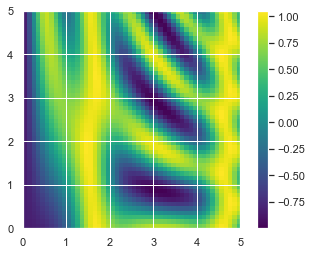

In [266]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

<img src="../figures/02.05-broadcasting.png" width="500" />

# Comparison, mask, boolean logic
Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold.

In [267]:
import numpy as np
import pandas as pd

In [268]:
# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('../data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

In [269]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()  # set plot styles

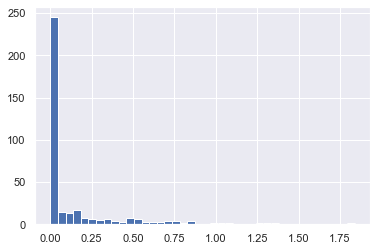

In [270]:
plt.hist(inches, 40);

We saw that using +, -, *, /, and others on arrays leads to element-wise operations.  
NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise ufuncs.  
The result of these comparison operators is always an array with a Boolean data type.


In [271]:
x = np.array([1, 2, 3, 4, 5])
x < 3

array([ True,  True, False, False, False])

In [272]:
x > 3

array([False, False, False,  True,  True])

<img src="../figures/2.4-numpy-comparison-operators.png" width="400" />

## Working with boolean arrays

### Counting entries

In [273]:
x = np.random.randint(10, size=(3, 4))
x

array([[8, 1, 3, 4],
       [2, 3, 2, 7],
       [0, 9, 4, 1]])

In [274]:
np.count_nonzero(x < 6) # how many values less than 6?

9

In [275]:
np.sum(x < 6, axis = 0) # how many values less than 6 in each column

array([2, 2, 3, 2])

In [276]:
np.any(x < 6) # are there any values lesser than 6?

True

In [277]:
np.all(x < 10) # are all values lesser than 10?

True

In [278]:
print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75


<img src="../figures/2.5-numpy-boolean-bitwise-operators.png" width="300" />

## Boolean Arrays as Masks
Boolean arrays as masks, to select particular subsets of the data themselves.  
When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where 1 = **True** and 0 = **False**

In [279]:
x

array([[8, 1, 3, 4],
       [2, 3, 2, 7],
       [0, 9, 4, 1]])

In [280]:
x[x < 6]

array([1, 3, 4, 2, 3, 2, 0, 4, 1])

What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is **True**

In [281]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


# Fancy indexing
Fancy indexing is like the simple indexing we’ve already seen, but we pass arrays of indices in place of single scalars. This allows us to very quickly access and modify complicated subsets of an array’s values

In [282]:
x = np.random.randint(100, size=10)
x

array([13,  9, 90, 24, 43,  8, 43, 20, 97, 35])

In [283]:
ind = [0, 3, 6]
x[ind]

array([13, 24, 43])

With fancy indexing, the shape of the result reflects the **shape of the index arrays** rather than the shape of the array being indexed:


In [284]:
ind = np.array([[3, 6], [2, 4]])
x[ind]

array([[24, 43],
       [90, 43]])

Fancy indexing also works in multiple dimensions. Consider the following array:

In [285]:
X = np.arange(12).reshape((3, 4))

row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

# Sorting arrays
Although Python has built-in sort and sorted functions to work with lists, we won’t discuss them here because NumPy’s np.sort function turns out to be much more efficient and useful for our purposes.


In [286]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [287]:
# in-place sort
x.sort()
x

array([1, 2, 3, 4, 5])

A related function is **argsort**, which instead returns the indices of the sorted elements:


In [288]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


## Sorting along rows or columns

In [289]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [290]:
# Sort along each column
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [291]:
# sort along each row
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial sorts: Partitioning
Sometimes we’re not interested in sorting the entire array, but simply want to find the K smallest values in the array.  
NumPy provides this in the **np.partition** function. **np.partition** takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in **arbitrary** order

In [292]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values.  
Within the two partitions, the elements have **arbitrary** order.


In [293]:
np.partition(X, 2, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [294]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

Finally, just as there is a np.argsort that computes indices of the sort, there is a **np.argpartition** that computes indices of the partition.

In [295]:
np.argpartition(X, 3)

array([[1, 3, 4, 0, 2, 5],
       [0, 4, 3, 1, 2, 5],
       [1, 4, 3, 2, 0, 5],
       [3, 2, 1, 0, 4, 5]])

## Example: k-nearest neighbour
Let’s quickly see how we might use this argsort function along multiple axes to find
the nearest neighbors of each point in a set

In [296]:
X = rand.rand(10, 2)
X[:3, :3]

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552]])

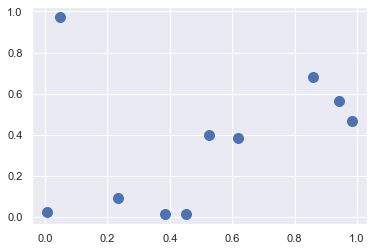

In [297]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set() # plot styling
plt.scatter(X[:, 0], X[:, 1], s=100)

In [298]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

Wow that's a lot of power packed in one statement.... Let's break that down

In [299]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [300]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [301]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

Just to double-check what we are doing, we should see that the diagonal of this matrix
(i.e., the set of distances between each point and itself) is all zero

In [302]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

With the pairwise square-distances converted, we can now use np.arg
sort to sort along each row.  
The leftmost columns will then give the indices of the
nearest neighbors:

In [303]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]])

Notice that the first column gives the numbers 0 through 9 in order: this is due to the
fact that each point’s closest neighbor is itself, as we would expect

By using a full sort here, we’ve actually done more work than we need to in this case.  
If we’re simply interested in the nearest k neighbors, all we need is to partition each
row so that the smallest k + 1 squared distances come first, with larger distances fill‐
ing the remaining positions of the array. We can do this with the **np.argpartition**
function

In [304]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)
nearest_partition

array([[3, 0, 9, 7, 1, 4, 2, 5, 8, 6],
       [1, 4, 7, 9, 3, 5, 6, 2, 8, 0],
       [2, 1, 4, 6, 3, 0, 5, 7, 8, 9],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4],
       [1, 8, 4, 5, 7, 6, 9, 3, 2, 0],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 5, 6, 2, 8, 0],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4]])

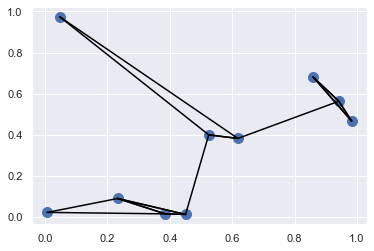

In [305]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

# Structured arrays
Structured arrays and record arrays provide efficient storage for compound, heterogenous data.  
 While the patterns shown here are useful for simple operations, scenarios like this often lend themselves to the use of **Pandas DataFrames**

## Creating structured arrays

In [306]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'), 'formats':('U10', 'i4', 'f8',)})
data.dtype

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

Here 'U10' translates to “Unicode string of maximum length 10,” 'i4' translates to
“4-byte (i.e., 32 bit) integer,” and 'f8' translates to “8-byte (i.e., 64 bit) float.”

In [307]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [308]:
data['name'] = name
data['age'] = age
data['weight'] = weight
data

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [309]:
# Get the name from the last row
data[-1]['name']

'Doug'

In [310]:
# Get names where age is under 30
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

A compound type can also be specified as a list of tuples:


In [311]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

<img src="../figures/numpy-data-types.png" width="600" />

## Record arrays: Structured arrays with a twist
NumPy also provides the np.recarray class, which is almost identical to the structured arrays just described, but with one additional feature

In [312]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

The downside is that for record arrays, there is some extra overhead involved in
accessing the fields, even when using the same syntax. We can see this here:

In [313]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

163 ns ± 9 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
2.51 µs ± 66.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.14 µs ± 94.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
